# Experiment 1
### Cedric Chauve, 09/01/2019

## Introduction

In this experiment (script *exp1a.sh*) we counted the number of histories for the following data:
- species tree size (number of leaves) from 3 to 32 (exp1a),
- for each species tree size, we considered 100 trees 
    - the first one (index 0) is the caterpillar,
    - if k is a power of 2 the second tree (index 1) is the complete binary tree,
    - the remaining trees are random,
- the history size (number of leaves) ranges from 1 to 50 (exp1a) and 1 to 128 (exp1b).

We record the results for species trees of a given size *k* in the file *results/exp1a_k.gz*. Each non-comment row of the result file has the following tab-separated format:
- species tree size,
- species tree index,
- ranking type (U for unranked, we do not consider ranked trees),
- newick string describing the tree,
- number of histories separated by spaces.

For each configuration, we count the number of histories in two models, one with only DL histories and one with DLT histories.
Additionally, the species trees formatted in the syntax required to use them in the Maple code is in the file *results/exp1a_k_add1*.

In [6]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
import io

In [2]:
# Parameters

# Number of species trees
NB_S_TREES    = 100
S_TREES_INDEX = [i for i in range(0,NB_S_TREES)]
# Evolutionary models
EVOL_MODELS = [('U','DL'),('U','DLT')]

In [10]:
# Format: RESULTS[evol_model][s][n][tree_index] is 
# the number of histories of size n for tree tree_index of size s in model evol_model

def read_results(S_SIZES,H_SIZES,S_TREES_INDEX,PREFIX):
    RESULTS = {x:{s:{n:{t:0 for t in S_TREES_INDEX} for n in H_SIZES}  for s in S_SIZES} for x in EVOL_MODELS}
    for s in S_SIZES:
        with gzip.open('../results/'+PREFIX+'_'+str(s)+'.gz', 'r') as f:
            reader = csv.reader(io.TextIOWrapper(f, newline=""),delimiter='\t')
            for row in reader:
                if row[0][0]!='#':
                    model = (row[2],row[3])
                    t_ind = int(row[1])
                    row5  = row[5].split()
                    for n in H_SIZES:
                        RESULTS[model][s][n][t_ind] = int(row5[n-1])
                    
    RESULTS_frame = pd.DataFrame.from_dict({(m,s,n): RESULTS[m][s][n] 
                                            for m in RESULTS.keys() 
                                            for s in RESULTS[m].keys()
                                            for n in RESULTS[m][s].keys()},
                                            orient='index')
    return((RESULTS,RESULTS_frame))

def compute_stats(RESULTS,S_SIZES,H_SIZES,S_TREES_INDEX):
    STATS = {x:{s:{n:{} for n in H_SIZES}  for s in S_SIZES} for x in EVOL_MODELS}

    for x in EVOL_MODELS:
        for s in S_SIZES:
            for n in H_SIZES:
                data =  np.array([RESULTS[x][s][n][t] for t in S_TREES_INDEX])
                STATS[x][s][n] = {'avg':np.mean(data), 'std':np.std(data), 'min':np.min(data), 'argmin': np.argmin(data), 'max':np.max(data), 'argmax': np.argmax(data), 'max/min':np.max(data)/np.min(data)}
            
    STATS_frame = pd.DataFrame.from_dict({(m,s,n): STATS[m][s][n] 
                                         for m in STATS.keys() 
                                         for s in STATS[m].keys()
                                         for n in STATS[m][s].keys()},
                                         orient='index')
    return((STATS,STATS_frame))

def compute_ratio_DL_DLT(RESULTS,S_SIZES,H_SIZES,S_TREES_INDEX):
    RATIOS = {s:{n:{} for n in H_SIZES}  for s in S_SIZES}
    for s in S_SIZES:
        for n in H_SIZES:
            ratios = np.array([RESULTS[('U','DLT')][s][n][t]/RESULTS[('U','DL')][s][n][t] for t in S_TREES_INDEX])
            RATIOS[s][n] = ratios
            
    RATIOS_frame = pd.DataFrame.from_dict({(s,n): RATIOS[s][n]
                                          for s in RATIOS.keys()
                                          for n in RATIOS[s].keys()},
                                          orient='index')
    return((RATIOS,RATIOS_frame))

def compute_ratio_stats_DL_DLT(RESULTS,S_SIZES,H_SIZES,S_TREES_INDEX):
    RATIOS = {s:{n:{} for n in H_SIZES}  for s in S_SIZES}
    for s in S_SIZES:
        for n in H_SIZES:
            ratios = np.array([RESULTS[('U','DLT')][s][n][t]/RESULTS[('U','DL')][s][n][t] for t in S_TREES_INDEX])
            RATIOS[s][n] = {'avg':np.mean(ratios), 'std':np.std(ratios), 'min':np.min(ratios), 'argmin': np.argmin(ratios), 'max':np.max(ratios), 'argmax': np.argmax(ratios), 'max/min':np.max(ratios)/np.min(ratios)}
            
    RATIOS_frame = pd.DataFrame.from_dict({(s,n): RATIOS[s][n]
                                          for s in RATIOS.keys()
                                          for n in RATIOS[s].keys()},
                                          orient='index')
    return((RATIOS,RATIOS_frame))

## Experiment exp1a

### Analysis 1.
The first analysis just look at the number of histories for each pair *(s,n)* (*s* = species tree size, *n* = histories size). For each selected pair, we look at the average number of histories, the standard deviation and the ration *max/min*.

In [11]:
# Analyse 1: average, standard deviation, ratio min and max for the number of histories per model for a given species tree size
S_SIZES_1a = [4,8,16,32]
H_SIZES_1a = [10,20,30,40,50]

(RESULTS_1a,RESULTS_1a_frame) = read_results(S_SIZES_1a,H_SIZES_1a,S_TREES_INDEX,'exp1a')
(STATS_1a_1,STATS_1a_1_frame) = compute_stats(RESULTS_1a,S_SIZES_1a,H_SIZES_1a, S_TREES_INDEX)

/home/cchauve/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [12]:
np.std([RESULTS_1a[('U','DLT')][4][10][t]/RESULTS_1a[('U','DL')][4][10][t] for t in S_TREES_INDEX])

119.24726917849956

In [13]:
STATS_1a_1_frame

avg            std  \
(U, DL)  4  10   1.528088e+11   7.106150e+10   
            20   1.542458e+24   1.131005e+24   
            30   2.743199e+37   2.415184e+37   
            40   6.157555e+50   5.843620e+50   
            50   1.560167e+64   1.526990e+64   
         8  10   1.069431e+15   1.185433e+15   
            20   1.053436e+32   1.987068e+32   
            30   2.222148e+49   5.379325e+49   
            40   6.473527e+66   1.804678e+67   
            50   2.229208e+84   6.792777e+84   
         16 10   1.669807e+19   3.312536e+19   
            20   4.683274e+40   2.479547e+41   
            30   4.061835e+62   3.185326e+63   
            40   5.585981e+84   5.069196e+85   
            50  9.429776e+106  9.044735e+107   
         32 10   6.176261e+23   3.972061e+24   
            20   5.816319e+50   5.709443e+51   
            30   1.062026e+78   1.056134e+79   
            40  2.264628e+105  2.253219e+106   
            50  5.302802e+132  5.276215e+133   
(U, DLT) 4  10   1.752166e+13   6.133182e+12   
            20   1.514884e+28   9.721257e+27   
            30   2.018906e+43   1.643860e+43   
            40   3.291495e+58   2.983338e+58   
            50   6.023096e+73   5.742435e+73   
         8  10   3.120879e+18   2.147185e+18   
            20   1.178510e+39   1.622850e+39   
            30   8.507284e+59   1.649371e+60   
            40   8.254932e+80   2.014162e+81   
            50  9.492952e+101  2.741970e+102   
         16 10   5.475555e+23   5.844810e+23   
            20   1.057805e+50   2.825356e+50   
            30   5.439087e+76   2.227179e+77   
            40  4.286640e+103  2.166397e+104   
            50  4.154438e+130  2.359575e+131   
         32 10   1.477965e+29   2.708660e+29   
            20   3.342045e+61   1.706565e+62   
            30   2.544343e+94   1.762178e+95   
            40  2.831338e+127  2.205293e+128   
            50  3.686546e+160            inf   

                                                              min  argmin  \
(U, DL)  4  10                                        81747301898       1   
            20                           411453750919795962806272       1   
            30              3280155810306287017714061918284546048       1   
            40  3139350984024567792720877239079752101255677214...       1   
            50  3317715958775567472622025942562903436069294041...       1   
         8  10                                    122798718575216       1   
            20                     903412575383271118144448495616       1   
            30    10554814107329070234953549877293046603098095616       1   
            40  1481094066626800444074252186793777067579113781...       1   
            50  2295293639359247775313675431658208560341639300...       1   
         16 10                                 151362953286590784       1   
            20              1354383999203599974929681093796823040       1   
            30  1927162461387958234060758670923757196531791784...       1   
            40  3294278707672285509458624283381237361753655103...       1   
            50  6219571795607740876440120281646536807095613474...       1   
         32 10                              169804992951501422592       1   
            20        1693316648270101735878377511505886040817664       1   
            30  2687035828551855274639528571148325489489714507...       1   
            40  5122986960731033021814832929695116311813771103...       1   
            50  1078818587976043744847755650548255978098954681...       1   
(U, DLT) 4  10                                     11388476350385       0   
            20                       5427578854927039359975686144       0   
            30        3750458668656514307629309987245705563996160       0   
            40  3081567181749240614453973611299807549600714576...       0   
            50  2806614214219630832451692728013098897744303527...       0   
         8  10                                 87691799

### Comments.
For both the DL and DLT models, the standard deviation is larger than the mean, indicating a very large spread of the distribution of the number of histories. This is also illustrated by the very large ration *max/min*.

### Analysis 2. 
We look at the ratio between the number of DLT-histories and the number of DL-histories.

In [21]:
(RATIOS_DLT_DL_1a,RATIOS_DLT_DL_1a_frame)             = compute_ratio_DL_DLT(RESULTS_1a,S_SIZES_1a,H_SIZES_1a,S_TREES_INDEX)
(RATIOS_STATS_DLT_DL_1a,RATIOS_STATS_DLT_DL_1a_frame) = compute_ratio_stats_DL_DLT(RESULTS_1a,S_SIZES_1a,H_SIZES_1a,S_TREES_INDEX)

In [15]:
RATIOS_STATS_DLT_DL_1a_frame

avg           std           min  argmin           max  argmax  \
4  10  1.701181e+02  1.192473e+02  5.087087e+01       0  2.893654e+02       1   
   20  3.123731e+04  2.920714e+04  2.030168e+03       0  6.044444e+04       1   
   30  5.619571e+06  5.546865e+06  7.270609e+04       0  1.116644e+07       1   
   40  1.000668e+09  9.981000e+08  2.567721e+06       0  1.998768e+09       1   
   50  1.773592e+11  1.772683e+11  9.091259e+07       0  3.546274e+11       1   
8  10  1.260555e+04  1.456839e+04  2.210804e+02       0  4.869717e+04       9   
   20  5.402675e+08  8.852135e+08  7.260741e+04       0  3.659552e+09       9   
   30  2.492480e+13  5.288377e+13  2.093507e+07       0  2.467991e+14       9   
   40  1.232500e+18  3.272380e+18  5.698700e+09       0  1.611923e+19       9   
   50  6.493701e+22  2.058045e+23  1.508190e+12       0  1.037417e+24       9   
16 10  4.968262e+05  1.107419e+06  5.007955e+02       0  6.299519e+06      93   
   20  4.604586e+12  1.684705e+13  7.979336e+05       0  1.333058e+14      93   
   30  5.666338e+19  2.823212e+20  1.318740e+09       0  2.582673e+21      93   
   40  8.050590e+26  5.060576e+27  2.146485e+12       0  4.900879e+28      93   
   50  1.260122e+34  9.314984e+34  3.443245e+15       0  9.223352e+35      93   
32 10  4.274391e+07  1.326423e+08  7.713588e+02       0  9.046889e+08      21   
   20  1.414552e+17  7.605034e+17  3.379853e+06       0  6.567423e+18      21   
   30  6.838943e+26  4.591836e+27  1.831086e+10       0  4.335493e+28      21   
   40  3.740377e+36  2.857026e+37  1.039881e+14       0  2.800732e+38      21   
   50  2.163093e+46  1.803287e+47  5.959088e+17       0  1.794976e+48      21   

            max/min  
4  10  5.688234e+00  
   20  2.977313e+01  
   30  1.535832e+02  
   40  7.784209e+02  
   50  3.900752e+03  
8  10  2.202690e+02  
   20  5.040191e+04  
   30  1.178879e+07  
   40  2.828581e+09  
   50  6.878555e+11  
16 10  1.257903e+04  
   20  1.670637e+08  
   30  1.958439e+12  
   40  2.283211e+16  
   50  2.678680e+20  
32 10  1.172851e+06  
   20  1.943109e+12  
   30  2.367716e+18  
   40  2.693321e+24  
   50  3.012165e+30

### Comments.
Again, a very large spread, as well as a quick increase of the ratio. This goes along the intuition that the search space grows very quickly when transfers are added to the model. 

<Figure size 432x288 with 0 Axes>

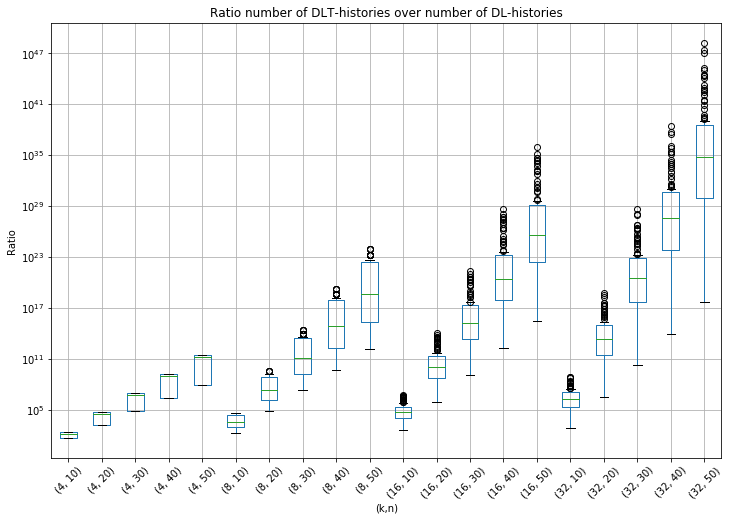

In [30]:
# Creating boxplots

RATIOS_DLT_DL_1a_frame.transpose()

plt.figure()
ax1 = RATIOS_DLT_DL_1a_frame.transpose().plot(kind='box', grid=True, return_type='axes', figsize=(12,8), title='Ratio number of DLT-histories over number of DL-histories')
ax1.set_ylabel('Ratio')
ax1.set_xlabel('(k,n)')
ax1.set_yscale('log')
plt.xticks(rotation=45)
plt.savefig('ratio_DLT_DL.png')
plt.show()